$\qquad$ $\qquad$$\qquad$  **TDA 232 Machine Learning: Home Assignment 3 -- Classification (20 points)** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: K-Nearest-Neighbour (Y), Naive-bayes Classifier (D), Support Vector Machine (D), Logistic Regression (Y)**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Yuchong (Y), Divya (D)** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 6th May** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Ella Guiladi, 930509-0822, guiladi@student.chalmers.se and Josefine Eriksson, 961207-0962, joseerik@student.chalmers.se**<br />


---


General guidelines:
*   All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
*   All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
*   Your name, personal number and email address should be specified above.
*   All tables and other additional information should be included in this notebook.
*   **All the answers for theoretical questions must be filled in the cells created for you with "Your answer here" below each question, but feel free to add more cells if needed.**
*   Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.



# Theoretical Questions
## 1. K-Nearest-Neighbour Classification (4 pts)
### 1.1 Exercise 1 (2 pts)
A KNN classifier assigns a test instance the majority class associated with its K nearest training instances. Distance between instances is measured using Euclidean distance. Suppose we have the following training set of positive (+) and negative (-) instances and a single test instance (o). All instances are projected onto a vector space of two real-valued features (X and Y). Answer the following questions. Assume “unweighted” KNN (every nearest neighbor contributes equally to the final vote).

![替代文字](https://raw.githubusercontent.com/BruceZHANG6/Imagesforuse/master/knn2.png)

a) What would be the class assigned to this test instance for K=1, K=5, K=7 and why? (**1 pt**)

b) The classification result is affected by the increasing K, so what will be the maxinum value of K you think in this case? Why? (**1 pt**)
(**Hint: After K reaches a certain value, the classification result will not change. Find the value!**)


### Your answer here:

**a)** Since there is no obvious distance measures on the axis, the assumptions on the distances are estimated visually.

K=1 implies classifification through the closest neighbor. For this test instance, the closest neighbor belong to the negative instance, thereby resulting in the test instance being classified as negative. 

K=5 implies classifification through the 5 closest neighbors. Since the 5 closest neighbors are 3 negative and 2 positive instances, the classification will be determined thorugh a majority vote, i.e the test instance will be classified as negative.

K=7 implies classifification through the 7 closest neighbors. The same majorit vote argument is done here as for K=5. However for K=7, the majority class is positive (3 negative and 4 positive instances). This results in the test instance being classified as positive. 

**b)** Since the positive instances are a majority, the test instance will always be classified as positive after a threshold value of K. Since we have 6 negative instances at a close distance to the test instance, the threshold must be $6*2+1=13$, i.e when K$\geq 13$, the positive instances will always win the majority vote. 

### 1.2 Exercise 2 (2 pts)
Consider 5 data points:

$$\{({0},{1}), ({-1},{0})\}∈ Class1,$$ 

$$\{({1},{0}), ({0},{-1}), (-\frac{1}{2}, \frac{1}{2})\}∈ Class2.$$

Consider two test data points:

$$(-\frac{3}{4}, \frac{3}{4})∈ Class1, (\frac{1}{2}, \frac{1}{2})∈ Class2$$

Compute the **probability of error** based on k-nearest neighbor rule when $ K=\{1, 2, 3, 4, 5\}$ and explain why.
(**Hint: The probability of error is the probability of one point is misclassified times the probability of another point is also misclassified**)

### Your answer here:

The posterior probability of classifying correctly can be defined through Bayes rule as,

$P(C_i|x)=\dfrac{P(x|C_i)P(C_i)}{P(x)}$,

where $P(x|C_i)=\dfrac{K_i}{N_i V}$, $P(x)=\dfrac{K}{NV}$ and $P(C_i)=\dfrac{N_i}{N}$,

where V is the volume of the sphere containing K points, K is the number neighbors and $K_i$ is the number of data points from class i within the sphere of volume V. N is the total amount of points such that $\sum_{i=1}N_i=N$ and $\sum_{j=1}N_j=N$ for the two test points. 

Instering these expressions in the posterior probability of classification results in the final expression,

$P(C_i|x)=\dfrac{K_i}{K}$.

Thereby, the probability of missclassification (i.e the probability of error) for one test data point is,

$P(e_i)=1-P(C_i|x)=1-\dfrac{K_i}{K}$, where $P(e_i)\in[0,1]$,

so the pobability of error for two test data points is given by,

$P(e)=(1-\dfrac{K_i}{K})(1-\dfrac{K_j}{K})$, where $P(e)\in[0,1]$.

For K=1 and for the test point belonging to class 1, the following expression is obtained,

$P(e_i)=1-\dfrac{0}{1}=1$, 

since the nearest neighboring point $(-\frac{1}{2}, \frac{1}{2})$ belongs to class 2 and the correct classification of the first test point should be class 1, the probability of missclassification is equal to 1, which is a reasonable result.

For K=1 and for the second test point, the two closest points $(1,0) \in$ class 2 and $(0,1)\in$ class 1, have the same distance to the test point. The closest neighbor for classification will thereby be chosen by chance, i.e there is 50% chance of missclassification since both cases have equal probability. 

The probability of error for K=1 thereby becomes,

$P(e)=1\cdot 0.5=0.5$

For K=2 and the first test point, the two closest data points are $(-\frac{1}{2}, \frac{1}{2})\in$ class 2 and $(0,1) \in$ class 1 or $(-1,0)\in$ class 1 (equal distance to both points $(0,1) $ and $(-1,0)$). The probability of error for the first test point becomes,

$P(e_i)=1-\dfrac{1}{2}=\dfrac{1}{2}$

For K=2 and the second test point, the two closest data points are $(1,0) \in$ class 2 and $(0,1)\in$ class 1, resulting in the probability of error for the second test point to be,

$P(e_j)=1-\dfrac{1}{2}=\dfrac{1}{2}$.

The probability of error for K=2 becomes,

$P(e)=\dfrac{1}{2}\cdot \dfrac{1}{2}=\dfrac{1}{4}$.

For K=3 and the first test point, the three closest data points are $(-\frac{1}{2}, \frac{1}{2})\in$ class 2, $(0,1) \in$ class 1 and $(-1,0) \in$ class 1. The probability of error for the first test point becomes,

$P(e_i)=1-\dfrac{2}{3}=\dfrac{1}{3}$

For K=3 and the second test point, the three closest data points are $(1,0) \in$ class 2, $(0,1)\in$ class 1 and $(-\frac{1}{2}, \frac{1}{2})\in$ class 2, resulting in the probability of error for the second test point to be,

$P(e_j)=1-\dfrac{2}{3}=\dfrac{1}{3}$.

The probability of error for K=3 becomes,

$P(e)=\dfrac{1}{3}\cdot \dfrac{1}{3}=\dfrac{1}{9}$.

For K=4 and the first test point, the four closest data points are $(-\frac{1}{2}, \frac{1}{2})\in$ class 2, $(0,1) \in$ class 1, $(-1,0) \in$ class 1 and $(0,-1) \in$ class 2 or $(1,0) \in$ class 2. The two points $(0,-1) \in$ class 2 and $(1,0) \in$ class 2 have the same distance to the test point, thereby there is a 50% chance of choosing either of them, however since both belong to class 2 the choice will not affect the probability of missclassification. The probability of error for the first test point becomes,

$P(e_i)=1-\dfrac{2}{4}=\dfrac{1}{2}$


For K=4 and the second test point, the four closest data points are $(1,0) \in$ class 2, $(0,1)\in$ class 1, $(-\frac{1}{2}, \frac{1}{2})\in$ class 2 and $(0,-1) \in$ class 2 or $(-1,0)\in$ class 1. The two points $(0,-1) \in$ class 2 or $(-1,0 \in)$ class 1 have the same distance to the test point, thereby there is a 50% chance of choosing either of them. This results in the probability of error for the second test point to be,

$P(e_j)=0.5(1-\dfrac{3}{4})+0.5(1-\dfrac{2}{4})=\dfrac{3}{8}$.

The probability of error for K=4 becomes,

$P(e)=\dfrac{1}{2}\cdot \dfrac{3}{8}=\dfrac{3}{16}$.

For K=5 and the first test point, the five closest data points are $(-\frac{1}{2}, \frac{1}{2})\in$ class 2, $(0,1) \in$ class 1, $(-1,0) \in$ class 1, $(0,-1) \in$ class 2 and $(1,0) \in$ class 2. The probability of error for the first test point becomes,

$P(e_i)=1-\dfrac{2}{5}=\dfrac{3}{5}$

For K=5 and the second test point, the five closest data points are $(1,0) \in$ class 2, $(0,1)\in$ class 1, $(-\frac{1}{2}, \frac{1}{2})\in$ class 2, $(0,-1) \in$ class 2 and $(-1,0)\in$ class 1. This results in the probability of error for the second test point to be,

$P(e_j)=1-\dfrac{3}{5}=\dfrac{2}{5}$

The probability of error for K=5 becomes,

$P(e)=\dfrac{3}{5}\cdot \dfrac{2}{5}=\dfrac{6}{25}=0.24$.

It can be observed from the exercise that K should be chosen as an odd intereger in order to avoid the randomness in calculations due to a tie in the majority vote when two data points have the exact same distance to a test point

## 2. [Naive Bayes Classifier, 6 points]

### Exercise 2.1 (3 pts)
A psychologist does a small survey on ''happiness''. Each respondent provides a vector with entries 1 or 0 corresponding to if they answered “yes” or “no” to a question respectively. The question vector has attributes 
$$
x = (\mbox{rich, married, healthy}) \tag{1}
$$

Thus a response $(1, 0, 1)$ would indicate that the respondent was
''rich'', ''unmarried'' and ''healthy''. In addition, each respondent
gives a value $c = 1$ if they are content wih their life and $c = 0$
if they’re not. The following responses were obtained.

$$
c = 1: (1, 1, 1),(0, 0, 1),(1, 1, 0),(1, 0, 0) \\
c = 0: (0, 0, 0),(1, 0, 1),(0, 0, 1),(0, 1, 0)
$$

1. Using naive Bayes, what is the probability that a person is ''not rich'', ''married'' and ''healthy'' is ''content''? **(1 pt)**

2. What is the probability that a person who is ''not rich'' and ''married'' is content ? (i.e. we do not know if they are ''healthy'') **(2 pts)**


### Your answer here:

**1.** The Naive-Bayes classifier is based on Bayes classifier with the following formula,

$P(t_{new}=k|x_{new},X,t)=\dfrac{P(x_{new}|t_{new}=k,X,t)P(t_{new}=k)}{\sum_{j=1}P(x_{new}|t_{new}=j,X,t)P(t_{new}=j)}$, 


The naive assumptions for the Naive-Bayes classifier is given by,

1. Independence among features, i.e $P(A,B) = P(A)P(B)$
2. Equal influence of the features, i.e the features are equally weighted.


Naive-Bayes makes the following additional likelihood assumption:

$ P(x_{new}|t_{new}=k,X,t)=\prod_{d=1}^{D}P(x_{d}^{new}|t_{new}=k,X,t)$.

We will use Gaussian class-conditional distributions with the Naive-Bayes assumption and assume that we have a uniform prior, i.e $P(t_{new}=k)=\dfrac{1}{K}$ so that,

$P(t_{new}=1)=\dfrac{1}{2}$.

Since the predicted values either assumes 1 or 0, we assume a binomial distribution for the class conditional densities,

$P(x_{new}|t_{new}=k,X,t)=\prod_{i=1}^{n}P_{k_i}^{x_i}(1-P_{k_i})^{1-x_i}$.

We are looking for the probability that a "content" person is ''not rich'', ''married'' and ''healthy'', i.e the response,


$c = 1: x^*=(0,1,1)$, which can be formulated by the following expression,

$P(c=1|x^* )=\dfrac{P(x^*|c=1)P(c=1)}{P(x^*|c=1)P(c=1)+P(\bar{x^*}|c=0)P(c=0)}$.

The probabilities for each case can be found from the following table,

|         | 1 |   |   |   | prob. | 0 |   |   |   | prob. |
|---------|---|---|---|---|-------|---|---|---|---|-------|
| Rich    | 1 | 0 | 1 | 1 | 3/4   | 0 | 1 | 0 | 0 | 1/4   |
| Married | 1 | 0 | 1 | 0 | 1/2   | 0 | 0 | 0 | 1 | 1/4   |
| Healthy   | 1 | 1 | 0 | 0 | 1/2   | 0 | 1 | 1 | 0 | 1/2   |

Inserteing the probabilities, we obtain the probability to be,

$P(c=1|x^* )= \dfrac{(1-0.75)0.5\cdot0.5\cdot0.5}{(1-0.75)0.5\cdot0.5\cdot0.5 + (1-0.25)0.25\cdot0.5\cdot0.5} = \dfrac{2}{5}=40\%.$


**2.** The probability that a "content" person is ''not rich'' and ''married'' can be obtained by the asumption that the features are independent. This is simply done by leaving out the "healthy" data, i.e using the following table,

|         | 1 |   |   |   | prob. | 0 |   |   |   | prob. |
|---------|---|---|---|---|-------|---|---|---|---|-------|
| Rich    | 1 | 0 | 1 | 1 | 3/4   | 0 | 1 | 0 | 0 | 1/4   |
| Married | 1 | 0 | 1 | 0 | 1/2   | 0 | 0 | 0 | 1 | 1/4   |

with the priors left the same.

The Naive-Bayes classifier is calculated the same way as in previous exercise but with the available independent features. We are now looking for the response,

$c = 1: x^*=(0,1)$, which can be formulated by the following expression,

$P(c=1|x^* )= \dfrac{(1-0.75)\cdot0.5\cdot0.5}{(1-0.75)\cdot0.5\cdot0.5 + (1-0.25)0.25\cdot0.5} = \dfrac{2}{5}=40\%.$

The result is the same as in precious exercise, which is explained by the fact that the features belonging to "healthy" have equal probability of belonging to c=1 as to c=0.


### Exercise  2.2 (3 pts)
Naive Bayes refers to the classifier which we now describe. We consider here **binary** classification problem with **real valued data** i.e. $x \in \mathbb{R}^2$.
#### 1. (1 pt)
Assume that the class conditional density is **spherical** Gaussian, that is, the likelihood of the training(and testing) data $X, y$ given class $i$ can be expressed as: 

$$ 
P( x_{new} | y_{new}, X, y) = P(x_{new} | \tag{1}
\mu_{i}, \Sigma_{i})
$$

Assume both classes have equal prior $p(y= \pm 1) = 0.5$. Write the expression for the **naive Bayes** classifier, that is, derive
$$
P(y_{new} = -1 | x_{new} , X, y ) \\ \tag{2}
P(y_{new} = +1 | x_{new} , X, y ) ~.
$$

***Hint***: Derive the expressions of MLE for parameters in terms of training-data. Then express eq.1 in terms of those estimates using Bayes rule. 

#### 2. (2 pts)
Derive the MLE expression for parameters when the covariance matrix is not diagonal, i.e, Covariance matrix has 4 unknown scalars. This is done to alleviate "naive" assumption, since now feature components are no longer independent.

### Your answer here:

**1**

It is given that the class conditional density is spherical gaussian, which likelihood can be expressed as

$$P(x_{new},|y_{new}= \pm 1,X,y)=P(x_{new},|\mu^{(\pm)}, \Sigma^{(\pm)}),$$

where 

$P(x_{new},|\mu^{(\pm)}, \Sigma^{(\pm)}) =\frac{1}{(2\pi)^{1/2}|\Sigma^{(\pm)}|^{1/2}}\exp{\frac{1}{2}(x_{new}-\mu^{(\pm)})^T(\Sigma^{(\pm)})^{-1}(x_{new}-\mu^{(\pm)})} $

 
To find the expressions for the MLE of $\mu$ and $\Sigma$ one takes the log of the likelihood

$$\log(P(x_{new},|\mu^{(\pm)}, \Sigma^{(\pm)}))=\sum_{n=1}^{N}\left(-\frac{1}{2} \log (2 \pi)-\frac{1}{2} \log \left(\mid2\Sigma^{(\pm)} \mid\right)-\frac{1}{4 \Sigma^{(\pm)}}\left(\mathbf{x}_{n}-\mu^{(\pm)}\right)^{T}\left(\mathbf{x}_{n}-\mu^{(\pm)}\right)\right)$$

and then the derivative with respect to $\mu^{(\pm)}$ and $\Sigma^{(\pm)}$ respectively. To find the maximum, one sets the derivatives to zero and searches for the corresponding optimal parameter values. 

For $\mu^{(\pm)}$, this is

$$\frac{\partial \log (L)}{\partial \boldsymbol{\mu^{(\pm)}}}=\frac{1}{4 \Sigma^{(\pm)}} \sum_{n=1} 2\left(\mathbf{x}_{n}-\boldsymbol{\mu^{(\pm)}}\right)=N \boldsymbol{\mu^{(\pm)}}-\sum_{n=1}^{N} \mathbf{x}_{n}=0$$ 

which results in

$$\hat{\mu}^{(\pm)} =\frac{1}{N} \sum_{n=1}^{N} \mathbf{x}_{n}.$$

The same was done for $\Sigma^{(\pm)}=I(\sigma^{(\pm)})^2$ as

$$\frac{\partial \log (L)}{\partial \sigma^{(\pm)}}=-\frac{N}{\sigma^{(\pm)}}+\frac{1}{2 (\sigma^{(\pm)}})^{3}\sum_{n=1}^{N}\left(\mathbf{x}_{n}-\boldsymbol{\mu^{(\pm)}}\right)^{T}\left(\mathbf{x}_{n}-\boldsymbol{\mu^{(\pm)}}\right)=0$$

resulting in

$$\Sigma^{(\pm)}=\frac{1}{2 N} \sum_{n=1}^{N}\left(\mathbf{x}_{n}-\boldsymbol{\mu^{(\pm)}}\right)^{T}\left(\mathbf{x}_{n}-\boldsymbol{\mu^{(\pm)}}\right).$$

These expressions can now be expressed for this specific trainingdata as, 

$$\hat{\mu}^{(-)} =\frac{1}{N} \sum_{n=1}^{N} \mathbf{x}_{n}\delta({\mathbf{y_{n}=-1}})$$
$$\hat{\mu}^{(+)} =\frac{1}{N} \sum_{n=1}^{N} \mathbf{x}_{n}\delta({\mathbf{y_{n}=+1}})$$

and 

$$\hat{\Sigma}^{(-)}=\frac{1}{2 N} \sum_{n=1}^{N}\left(\mathbf{x}_{n}-\boldsymbol{\mu^{(-)}}\right)^{T}\left(\mathbf{x}_{n}-\boldsymbol{\mu^{(-)}}\right)\delta({\mathbf{y_{n}=-1}})$$
$$\hat{\Sigma}^{(+)}=\frac{1}{2 N} \sum_{n=1}^{N}\left(\mathbf{x}_{n}-\boldsymbol{\mu^{(+)}}\right)^{T}\left(\mathbf{x}_{n}-\boldsymbol{\mu^{(+)}}\right)\delta({\mathbf{y_{n}=+1}})$$

The dirac function is used in order to include the right elements from the inputdata.

The expressions for the Naive Bayes classifiers becomes:

$$
P(y_{new} = -1 | x_{new} , X, y ) = \frac{P(x_{new},|\hat{\mu}^{(-)}, \hat{\Sigma}^{(-)})P(y_{new} = -1)}{P(x_{new},|\hat{\mu}^{(+)}, \hat{\Sigma}^{(+)})P(y_{new} = +1)+P(x_{new},|\hat{\mu}^{(-)}, \hat{\Sigma}^{(-)})P(y_{new} = -1)}$$

$$P(y_{new} = +1 | x_{new} , X, y ) = \frac{P(x_{new},|\hat{\mu}^{(+)}, \hat{\Sigma}^{(+)})P(y_{new} = +1)}{P(x_{new},|\hat{\mu}^{(-)}, \hat{\Sigma}^{(-)})P(y_{new} = -1)+P(x_{new},|\hat{\mu}^{(+)}, \hat{\Sigma}^{(+)})P(y_{new} = +1)}.
$$

with $P(y_{new} = -1)=P(y_{new} = +1)=0.5$ and the MLE expressions derived above.


**2**

The likelihood for a multivariate gaussian distribution with full covariance can be expressed as:

$P(x_{new},|\mathbf{\mu}^{i}, \mathbf{\Sigma}^{i}) =\frac{1}{(2\pi)^{1/2}| \mathbf{\Sigma}^{i}|^{1/2}}\exp{\frac{1}{2}(x_{new}-\mathbf{\mu}^{i})^T( \mathbf{\Sigma}^{i})^{-1}(x_{new}-\mathbf{\mu}^{i})},$ with $i= +1/-1$ denoting the respective class.  

As was done in the derivation of the MLE expressions above, the likelihood function is logaritmized 
$$\log(P(x_{new},|\mathbf{\mu}^{i}, \mathbf{\Sigma}^{i}))=\sum_{n=1}^{N}\left(-\frac{1}{2} \log (2 \pi)-\frac{1}{2} \log \left(\mid2\mathbf{\Sigma}^{i} \mid\right)-\frac{1}{4 \mathbf{\Sigma}^{i}}\left(\mathbf{x}_{n}-\mathbf{\mu}^{i}\right)^{T}\left(\mathbf{x}_{n}-\mathbf{\mu}^{i}\right)\right).$$

To get the maximum of the log-likelihood, one takes the derivative of $\mu$ and $\Sigma$ respectively and solves for the derivatives equal to zero as above, resulting in 

$$\hat{\mu}_{j}^{i} =\frac{1}{N} \sum_{n=1}^{N} \mathbf{x}_{n,j}\delta({\mathbf{y_{n}=i}})$$ with $j=1,...,d$
and 
$$\hat{\sigma}_{j,k}^{i}=\frac{1}{2 N} \sum_{n=1}^{N}\left(\mathbf{x}_{n,j}-\boldsymbol{\mu_{j}}\right)^{T}\left(\mathbf{x}_{n,k}-\boldsymbol{\mu_{k}}\right)\delta({\mathbf{y_{n}=i}})$$ with $j,k=1,...,d$, where d denotes the dimensions of the input data and $i=+1/-1$ denotes the classes. 

The final expressions corresponding to this dataset is thus
$$\hat{\mu}_{j}^{+} =\frac{1}{N} \sum_{n=1}^{N} \mathbf{x}_{n,j}\delta({\mathbf{y_{n}=+1}}),$$ for j=1,2  
$$\hat{\mu}_{j}^{-} =\frac{1}{N} \sum_{n=1}^{N} \mathbf{x}_{n,j}\delta({\mathbf{y_{n}=-1}}),$$ for j=1,2 
and 
$$\hat{\sigma}_{j,k}^{+}=\frac{1}{2 N} \sum_{n=1}^{N}\left(\mathbf{x}_{n,j}-\boldsymbol{\mu_{j}^{(+)}}\right)^{T}\left(\mathbf{x}_{n,k}-\boldsymbol{\mu_{k}^{(+)}}\right)\delta({\mathbf{y_{n}=+1}}),$$ for j,k=1,2 
$$\hat{\sigma}_{j,k}^{-}=\frac{1}{2 N} \sum_{n=1}^{N}\left(\mathbf{x}_{n,j}-\boldsymbol{\mu_{j}^{(-)}}\right)^{T}\left(\mathbf{x}_{n,k}-\boldsymbol{\mu_{k}^{(-)}}\right)\delta({\mathbf{y_{n}=-1}}),$$ for j,k=1,2.

## 3. [SVM, 5 points]

### Excercise 3.1 (2 pts)

Consider a (hard margin) SVM with the following training points from
two classes:
\begin{eqnarray}
+1: &(2,2), (4,4), (4,0) \nonumber \\
-1: &(0,0), (2,0), (0,2) \nonumber
\end{eqnarray}

1. Plot these six training points, and construct, by inspection, the
weight vector for the optimal hyperplane. **(1 pt)**

2. In your solution, specify the hyperplane in terms of w and b such that $w_1 x_1 + w_2 x_2 + b =0$. Calculate the margin, i.e. $2\gamma$, where $\gamma$ is the
distance from the hyperplane to its closest data point. (Hint: It may be useful to recall that the distance of a point $(a_1,a_2)$ from the line $w_1x_1 + w_2x_2 + b = 0$ is $|w_1a_1 + w_2a_2 + b|/\sqrt{w_1^2 + w_2^2}$.) **(1 pt)**

### Excercise 3.2 (3 pts)

Consider the same problem from above.

1. Write the primal formulation of the SVM **for this specific example** i.e. you have to specialise the general formulation for the set of inputs given. **(1 pt)**

2. Write the dual formulation **for this specific**. Give the optimal dual solution, comment on support vectors. **(2 pts)**

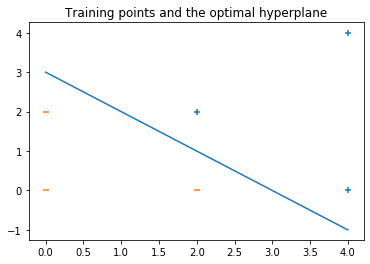

In [2]:
#Exercise 1
import numpy as np
import matplotlib.pyplot as plt

x1=[2,4,4]
y1=[2,4,0]
x2=[0,2,0]
y2=[0,0,2]

plt.scatter(x1, y1, marker='+')
plt.scatter(x2, y2, marker='_')
plt.plot([0,4],[3,-1])
plt.title('Training points and the optimal hyperplane')
plt.show()

### Your answer here:

### Excercise 3.1
**1**

The hyperplane was created with the equation for the straight line by using the information about the training points,

$y=-x+3$,

and inserting boundary points. 

By plotting the training points in the plot above it is possible to see that the support vectors for the +1 class are (2,2) and (4,0) and the support vectors for the -1 class are (2,0) and (0,2). We now want to calculate the optimal hyperplane, i.e. the line that optimally separates the two classes. The weight vector for the hyperplane is perpendicular to that hyperplane and thus has the following equation,

$W=w_1 x_1+w_2 x_2 + b=0$.

In order to calculate this, one can insert the values of the support vectors into $x_1,x_2$, such that for the -1 class,

$2w_1+0w_2+b=-1$,

$0w_1+2w_2+b=-1$,

resulting in,

$b=-2w_1-1=-2w_2-1$, i.e $(w_1,w_2)=(1,1)$

The same procedure is done for the support vectors from the +1 class, resulting in $(w_1,w_2)=(1,1)$ as well. 

We can thereby solve for the parameter b by inserting the values of $(w_1,w_2)$,

$b=-2w_1-1=-3$.


**2**

We know that,

$2\gamma=\dfrac{2|w_1a_1 + w_2a_2 + b|}{\sqrt{w_1^2 + w_2^2}}$,

where $(a_1,a_2)$ is a point close to the hyperplane. We chose $(a_1,a_2)=(2,0)$ (the margin is the same for all the the support vectors), resulting in the following equation,

$2\gamma =\dfrac{2|1\cdot2+1\cdot0-3|}{\sqrt{1^2+1^2}}=\sqrt{2}$

### Excercise 3.2

**1**

The primal formulation of the SVM can be expressed as follows: 

$$argmin_{w} \frac{1}{2}\mathbf{w}^T\mathbf{w},$$

subject to

$$t_{n}(\mathbf{w}^{T}\mathbf{x}_{n}+b)\geq 1.$$

The constraints for this specific example are as follows:

$$1\cdot(2w_1+2w_2+b)\geq 1$$
$$1\cdot(4w_1+4w_2+b)\geq 1$$
$$1\cdot(4w_1+0+b)\geq 1$$

$$-1\cdot(0+0+b)\geq1$$
$$-1\cdot(2w_1+0+b)\geq1$$
$$-1\cdot(0+2w_2+b)\geq1$$

**2**

The dual formulation of the SVM can be expressed as follows:

$$\underset{\alpha}{argmax} \sum_{n=1}^{N}\alpha_n - \frac{1}{2}\sum_{n.m=1}^{N}\alpha_n\alpha_m t_n t_m \mathbf{x}_n^T\mathbf{x}_m$$

subject to
$$\sum_{n=1}^{N}\alpha_n t_n = 0, \alpha_n\geq0,$$

where N=6 in our case.

In order to get an easier overview of the double sum (the different combinations of $\alpha_n$ with corresponding class label we can write the matrix,

|         | $\alpha_1$| $\alpha_2$  | $\alpha_3$  | $\alpha_4$  |$\alpha_5$ | $\alpha_6$ |
|---------|-----------|-------------|-------------|-------------|-----------|------------|
| $\alpha_1$| 8       | 16          | 8           | 0           | -4        | -4         |
|$\alpha_2$ | 16      | 32          | 16          | 0           | -8        | -8         |
| $\alpha_3$| 8       | 16          | 16          | 0           | -8        | 0          |
| $\alpha_4$| 0       | 0           | 0           | 0           | 0         | 0          |
| $\alpha_5$| -4      | -8          | -8          | 0           | 4         | 0          |
| $\alpha_6$| -4      | -8          | 0           | 0           | 0         | 4          |

where

$[(2,2),t_n = 1,\alpha_1],$

$[(4,4),t_n=1,\alpha_2],$

$[(4,0),t_n=1,\alpha_3],$

$[(0,0)^T,t_n=-1,\alpha_4].$

$[(2,0)^T,t_n=-1,\alpha_5].$

$[(0,2)^T,t_n=-1,\alpha_6].$

By inserting the different combination into the dual formulation presented above, it is possible to get the dual solution, as


$$\underset{\alpha}{argmax} \sum_{n=1}^{N}\alpha_n - (4\alpha_1^2+8\alpha_1\alpha_2+4\alpha_1\alpha_3-2\alpha_1\alpha_5-2\alpha_1\alpha_6+8\alpha_1\alpha_2+16\alpha_2^2+8\alpha_2\alpha_3-4\alpha_2\alpha_5-4\alpha_2\alpha_6+4\alpha_3\alpha_1+8\alpha_3\alpha_2+8\alpha_3^2-4\alpha_3\alpha_5-2\alpha_5\alpha_1-4\alpha_5\alpha_2-4\alpha_5\alpha_3+2\alpha_5^2-2\alpha_6\alpha_1-4\alpha_6\alpha_2+2\alpha_6^2$$ 


subject to 

$$\Sigma_{n=1}^N \alpha_n t_n = \alpha_1 + \alpha_2 + \alpha_3 - \alpha_4 - \alpha_5 - \alpha_6 = 0$$

$$\alpha_n \geq 0$$

At the optimum $\alpha_n\geq0$ only holds for the points closest to the hyperplane. Thereby the only vectors that will eventually will be used are the support vectors, in order to solve the optimization problem.
 
In order to solve this equation, one can for example use Matlabs quadprog and get the values lagrangian term of the support vectors.


# Practical Question
## 4. Logistic Regression (5 pts)
### Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

### About the dataset

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.
This data set provides information to help you predict what behavior will help you to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.
The dataset includes information about:
*   Customers who left within the last month – the column is called Churn.
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
*   Demographic info about customers – gender, age range, and if they have partners and dependents.
We will help you load and visualise the dataset as well as the preprocessing, you need to build up your logistic regression model step by step and do the prediction.
*   **Remember, you are not allowed to use sklearn in modelling and predicting, you have to fill your code in the skeleton.** 








In [1]:
## Load the dataset and read it
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import urllib

try:
    urllib.request.urlretrieve('https://raw.githubusercontent.com/BruceZHANG6/Imagesforuse/master/ChurnData.csv', 'ChurnData.csv')
except urllib.error.HTTPError as ex:
    print('Problem:', ex)
    
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [2]:
## Data pre-processing and selection
## Train/Test dataset split
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])
y = np.reshape(y, (np.asarray(churn_df['churn']).shape[0], 1))
X = preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
X_train=X_train.T
X_test=X_test.T
y_train=y_train.T
y_test=y_test.T
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7, 160) (1, 160)
Test set: (7, 40) (1, 40)


**Hints**:
- You compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ .
- You compute activation $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$.
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$.

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

- You write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.
- In prediction, you calculate $\hat{Y} = A = \sigma(w^T X + b)$.
- You may use np.exp, np.log(), np.dot(), etc. 

In [3]:
## Modeling and predicting

# GRADED FUNCTION: sigmoid
def sigmoid(z):
    """
    Return: s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z)) # calculating the sigmoid function of the input z=w^Tx+b
    
    return s
  
# GRADED FUNCTION: initialize_with_zeros
def initialize_with_zeros(dim):
    """
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized to 0
    """    
    w = np.zeros((dim,1)) # initializing a vector of zeros with dimensions dim * 1
    b = 0 # initializing b as zero
   
    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b
  
# GRADED FUNCTION: grad_cost
def grad_cost(w, b, X, Y):
    """
    Arguments:
    X -- data of size (number of features, number of examples)
    Y -- true "label" vector

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """ 
    m = X.shape[1]
    
    A =  1/(1+np.exp(-(np.transpose(w).dot(X)+b*np.ones(m)))) # A is a vector with the activation for each observation 
    cost = -np.mean(Y*np.log(A)+(np.ones(m)-Y)*np.log(np.ones(m)-A))  # calculating the cost using the cost function                        
    dw = (1/m)*X.dot(np.transpose(A-Y)) # the derivative of J with respect to w
    db = np.mean(A-Y) # the derivative of J with respect to b

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

 # GRADED FUNCTION: optimize
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    """
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = grad_cost(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate*dw # updating w using update-rule with alpha=0.001
        b = b - learning_rate*db # updating b using update-rule with alpha=0.001
        
        if i % 100 == 0:
            costs.append(cost)     
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}   
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
  
# GRADED FUNCTION: predict
def predict(w, b, X):
    '''
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = 1/(1+np.exp(-(np.transpose(w).dot(X)+b*np.ones(m)))) # using activation as prediction of Y
    
    for i in range(A.shape[1]):
        
        if A[0,i]<=0.5:
            Y_prediction[0,i]=0;
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction
  
# GRADED FUNCTION: model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    Returns: d -- dictionary containing information about the model.
    """    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0]) # calling the initialization function
    
    #w, b = initialize_with_zeros(X.shape[1])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False) #calling the optimization function
    #parameters, grads, costs = optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    #The train accuracy: The accuracy of a model on examples it was constructed on.
    #The test accuracy is the accuracy of a model on examples it hasn't seen.
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
   
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [4]:
## The train accuracy and test accuracy
## Feel free to change the hyperparameters
d = model(X_train, y_train, X_test, y_test, num_iterations = 20000, learning_rate = 0.003, print_cost = True)

train accuracy: 77.5 %
test accuracy: 72.5 %
